# Kantorovich distance as similiarity between documents

In [1]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

document_1 = ["media", "Illinois", "speaks", "Obama"]
document_2 = ["President", "greets", "press", "Chicago"]

### Load word embedding dictionary

In [2]:
word_embedding = np.load("word_embedding.npy").item()

def distance(word1, word2):
    return np.linalg.norm(word_embedding[word1] - word_embedding[word2])

# TODO: Construct C matrix where C_ij = dist(document_1[i], document_2[j]).
C = [[0 for _ in range(len(document_2))] for _ in range(len(document_1))]

### Compute the transportation plan as well as the transportation cost (aka EMD)

In [3]:
# We assume that the length of document one and two are equal.
l = len(document_1)

# Compute normalized frequency vectors for sentence one and two. 
mu = [1. / l for _ in range(l)]
nu = [1. / l for _ in range(l)]

# To formulate and solve the LP, the C and P matrices need to reshaped
# to vectors of length lxl
c = np.array(C).reshape((l**2))

# Construct matrices of ones, A_r and A_t, which when multiplied by P 
# reshaped to lxl vector gives us the equality contraints.
# Where row i of A_r equals sum of entries of P_i and row i of A_t
# equals sum of entries of row i of (P^T). 
A_r = np.zeros((l, l, l))
A_t = np.zeros((l, l, l))

# TODO: Solve LP with objective C^Tx, constraints Ax = b.
P = np.zeros((l,l))
emd = 0

print("EMD: " + str(emd))

EMD: 0


Visualize P transportation plan: 


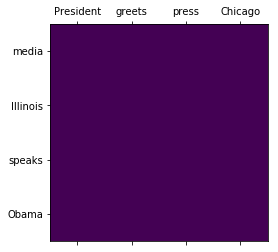

In [4]:
print("Visualize P transportation plan: ")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(P)

# We want to show all ticks
ax.set_xticks(np.arange(len(document_1)))
ax.set_yticks(np.arange(len(document_2)))

ax.set_xticklabels(document_2)
ax.set_yticklabels(document_1)

plt.show()